In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Dataset / Data cleaning

In [3]:
orders = pd.read_csv('../datasets/orders.csv')
oi = pd.read_csv('../datasets/order_items.csv')
op = pd.read_csv('../datasets/order_payments.csv')
cust = pd.read_csv('../datasets/customers.csv')
prod = pd.read_csv('../datasets/products.csv')

In [14]:
prod.columns.to_list()

['product_id',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [10]:
oi.columns.to_list()

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value']

In [11]:
orders.columns.to_list()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [12]:
op.columns.to_list()

['order_id',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value']

In [13]:
cust.columns.to_list()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

# Você sente que precisa aprofundar as análises para a nova CEO.    


## Então gere alguns gráficos que analisem…

- A proporção de vendas por estado
- A proporção de vendas por mês (data do pedido)
- A proporção de vendas por ano/mês (data do pedido)
- A evolução de vendas ao longo de anos e meses

### Proporção de vendas por estado

<BarContainer object of 27 artists>

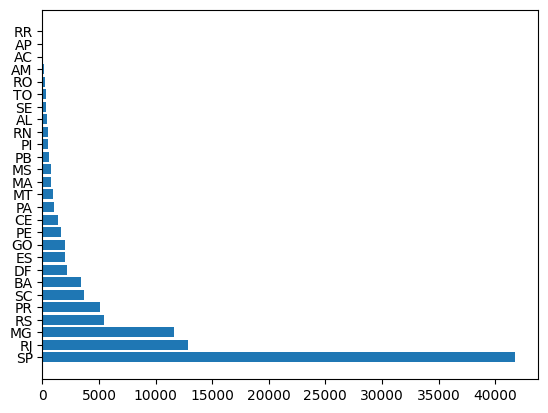

In [13]:
# faz o join da base de pedidos com clientes para obter os estados
order_customers = pd.merge(orders, cust, on='customer_id', how='left')

#order_customers.info()
#plt.bar(order_customers['customer_state'], order_customers['order_id'].count())
state_counts = order_customers['customer_state'].value_counts()
states = state_counts.index.to_list()
plt.barh(states,state_counts)


### A proporção de vendas por mês (data do pedido)

In [32]:
# Converter a coluna da data em Datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
# Criar coluna de mês e ano
orders['month'] = orders['order_purchase_timestamp'].apply(lambda x: str(x.month))
orders['month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime("%B"))
orders['month/year'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime("%b/%Y"))
orders['year'] = orders['order_purchase_timestamp'].apply(lambda x: str(x.year))
orders['period'] = orders['month_name'] + '/' + orders['year']
# Proporção de vendas por período
orders_period = orders['period'].value_counts()
periods = orders_period.index.to_list()
orders_by_period = orders.groupby('month/year').count().reset_index()
orders_by_period['month/year'] = pd.to_datetime(orders_by_period['month/year'], format='%b/%Y')
orders_by_period['month/Year'] = orders_by_period['month/year'].apply(lambda x: x.strftime("%b/%Y")) 
orders_by_period = orders_by_period[['month/year', 'month/Year', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'month', 'month_name', 'year',
       'period']]
orders_by_period = orders_by_period.sort_values('month/year', ascending=True)

### A proporção de vendas por mês (data do pedido)

<BarContainer object of 12 artists>

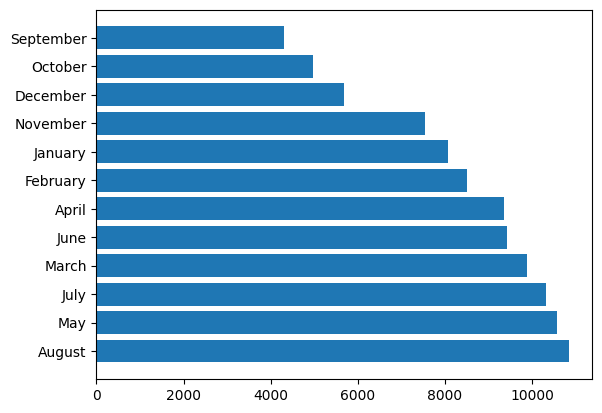

In [41]:
orders_month = orders['month_name'].value_counts()
months = orders_month.index.to_list()
plt.barh(months, orders_month)


### A proporção de vendas por ano/mês (data do pedido)

<BarContainer object of 25 artists>

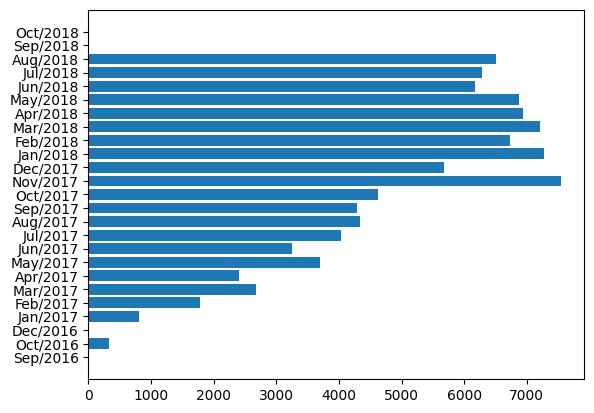

In [44]:
plt.barh(orders_by_period['month/Year'], orders_by_period['order_id'])

<BarContainer object of 25 artists>

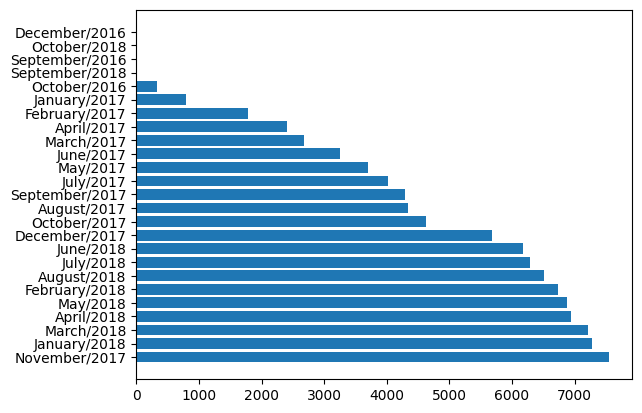

In [43]:
plt.barh(periods, orders_period)

### A evolução de vendas ao longo de anos e meses

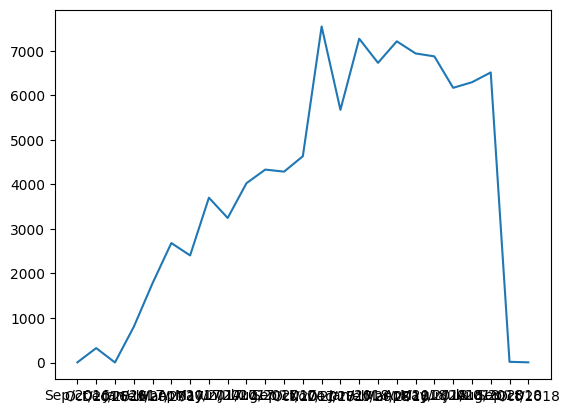

In [34]:
orders_by_period
plt.plot(orders_by_period['month/Year'], orders_by_period['order_id'])

## …e que respondam às seguintes perguntas:

- O custo do frete está relacionado com o valor do bem comprado?
- Existe uma preferência de meio de pagamento de acordo com o valor do pagamento?
- O peso e o volume do produto comprado têm relação com
- o valor do frete?
- O peso e o volume do